In [80]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Exploratory Data Analysis

In this section, several objectives will be performed:
1. Preliminary Data Cleaning
2. Univariate Analysis
   * Descriptive Statistics
   * Demographic Analysis
   * Product Purchase Analysis
   * Promotional Response Analysis
   * Channel Analysis
3. Bivariate Analysis

## Preliminary Data Cleaning

In [81]:
# Load the data

customer_df = pd.read_csv("../input/customer-personality-analysis/marketing_campaign.csv", sep="\t")
customer_df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [82]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

It could be seen that the ***Income*** column has only 2216 entries, as opposed to 2240, which could indicate that there are NaN values.

In [83]:
# Check for any NaN values
customer_df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

There are 24 entries in the *Income* column with NaN values, therefore, the rows containing these entries have to be removed

In [84]:
# Remove the NaN values
customer_df = customer_df.dropna()
print(f"Number of rows after NaN removal: {len(customer_df)}")

Number of rows after NaN removal: 2216


From the info(), the ***Dt_Customer*** is still in the *object* data type, therefore it must be converted to DateTime

In [85]:
customer_df["Dt_Customer"] = pd.to_datetime(customer_df["Dt_Customer"], format="%d-%m-%Y")

***Dt_Customer*** can then be replaced to a more quantitative value that indicates how long a customer has been enrolled for, assuming until 2024-01-01

In [86]:
current_day = pd.to_datetime('2024-01-01')
customer_df['Days_Enrolled'] = current_day - customer_df['Dt_Customer']
customer_df['Days_Enrolled'] = customer_df["Days_Enrolled"].dt.days

## Univariate Analysis

### Descriptive Statistics

In this section, the distribution of the categorical features, ***Education*** and ***Marital Status*** will be seen

In [87]:
education_distribution = customer_df['Education'].value_counts()
print("Education Distribution:")
print(education_distribution)

marital_status_distribution = customer_df['Marital_Status'].value_counts()
print("\nMarital Status Distribution:")
print(marital_status_distribution)

Education Distribution:
Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

Marital Status Distribution:
Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


It could be seen that there are some redundant entries in the Education and Marital Status distributions and the categories can be simplified

In [88]:
# Combine Education categories
customer_df['Education'] = customer_df['Education'].replace({
    'Graduation': 'Higher Education',
    'PhD': 'Higher Education',
    'Master': 'Higher Education',
    '2n Cycle': 'Higher Education',
    'Basic': 'Basic Education'
})

# Combine Marital Status categories
customer_df['Marital_Status'] = customer_df['Marital_Status'].replace({
    'Married': 'Relationship',
    'Together': 'Relationship',
    'Single': 'Single',
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO': 'Single',
    'Divorced': 'Single',
    'Widow': 'Single'
})

In [89]:
# Check the distribution after combining
education_distribution = customer_df['Education'].value_counts()
print("Education Distribution:")
print(education_distribution)

marital_status_distribution = customer_df['Marital_Status'].value_counts()
print("\nMarital Status Distribution:")
print(marital_status_distribution)

Education Distribution:
Education
Higher Education    2162
Basic Education       54
Name: count, dtype: int64

Marital Status Distribution:
Marital_Status
Relationship    1430
Single           786
Name: count, dtype: int64


In [90]:
def add_percentages(ax, data, feature):
    total = len(data)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

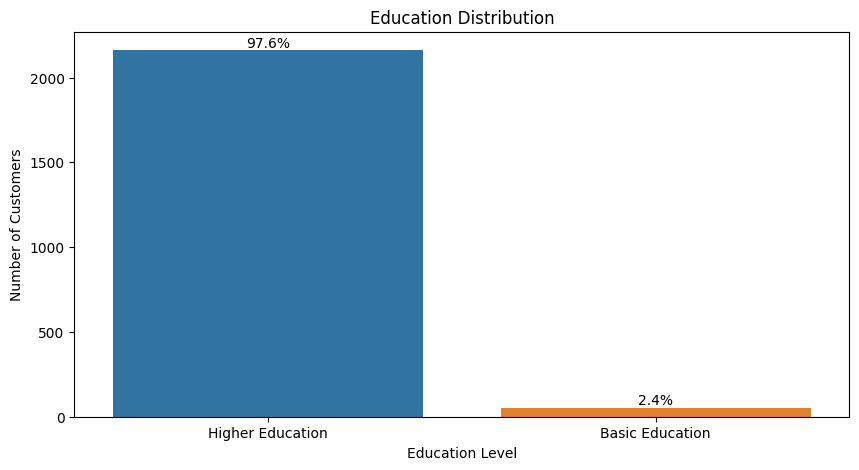

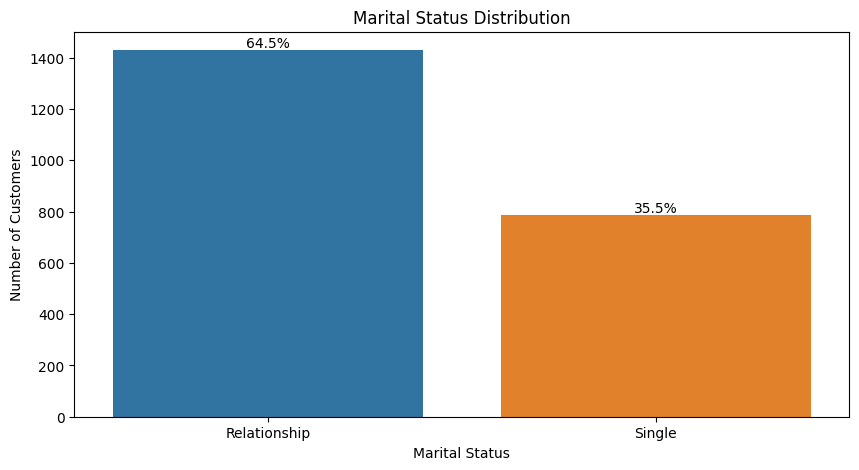

In [91]:
# Plot the updated Education distribution with percentages
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Education', data=customer_df, order=customer_df['Education'].value_counts().index)
add_percentages(ax, customer_df, 'Education')
plt.title('Education Distribution')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')
plt.show()

# Plot the updated Marital Status distribution with percentages
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Marital_Status', data=customer_df, order=customer_df['Marital_Status'].value_counts().index)
add_percentages(ax, customer_df, 'Marital_Status')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Number of Customers')
plt.show()

In [92]:
# Check the descriptive statistics of the data
customer_df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2216.000000  2216.000000    2216.000000  2216.000000  2216.000000   
mean    5588.353339  1968.820397   52247.251354     0.441787     0.505415   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2814.750000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8421.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   
std     3249.376275    11.985554   25173.076661     0.536896     0.544181   

                         Dt_Customer      Recency     MntWines    MntFruits  \
count                           2216  2216.000000  2216.000000  2216.000000   
mean   2013-07-10 11:29:27.509025280    49.012635   305.091606    26.356047   
min              2012-07-30 00:00:00     0.000000     0.000000     0.000000   
25%              2013-01-16 00:00:00    24.000000    24.000000     2.000000   
50%              2013-07-08 12:00:00    49.000000   174.500000     8.000000   
75%              2013-12-31 00:00:00    74.000000   505.000000    33.000000   
max              2014-06-29 00:00:00    99.000000  1493.000000   199.000000   
std                              NaN    28.948352   337.327920    39.793917   

       MntMeatProducts  ...  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count      2216.000000  ...   2216.000000   2216.000000   2216.000000   
mean        166.995939  ...      0.073556      0.074007      0.073105   
min           0.000000  ...      0.000000      0.000000      0.000000   
25%          16.000000  ...      0.000000      0.000000      0.000000   
50%          68.000000  ...      0.000000      0.000000      0.000000   
75%         232.250000  ...      0.000000      0.000000      0.000000   
max        1725.000000  ...      1.000000      1.000000      1.000000   
std         224.283273  ...      0.261106      0.261842      0.260367   

       AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count   2216.000000   2216.000000  2216.000000         2216.0     2216.0   
mean       0.064079      0.013538     0.009477            3.0       11.0   
min        0.000000      0.000000     0.000000            3.0       11.0   
25%        0.000000      0.000000     0.000000            3.0       11.0   
50%        0.000000      0.000000     0.000000            3.0       11.0   
75%        0.000000      0.000000     0.000000            3.0       11.0   
max        1.000000      1.000000     1.000000            3.0       11.0   
std        0.244950      0.115588     0.096907            0.0        0.0   

          Response  Days_Enrolled  
count  2216.000000    2216.000000  
mean      0.150271    3826.521209  
min       0.000000    3473.000000  
25%       0.000000    3653.000000  
50%       0.000000    3828.500000  
75%       0.000000    4002.000000  
max       1.000000    4172.000000  
std       0.357417     202.434667  

[8 rows x 28 columns]

It could be seen that the standard deviation (std) of the Z_CostContact and Z_Revenue are 0, indicating that the columns have the same value throughout, therefore, it can be removed since it will not add any value to the model

In [93]:
customer_df = customer_df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)
customer_df.head()

ID  Year_Birth         Education Marital_Status   Income  Kidhome  \
0  5524        1957  Higher Education         Single  58138.0        0   
1  2174        1954  Higher Education         Single  46344.0        1   
2  4141        1965  Higher Education   Relationship  71613.0        0   
3  6182        1984  Higher Education   Relationship  26646.0        1   
4  5324        1981  Higher Education   Relationship  58293.0        1   

   Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0         0  2012-09-04       58       635  ...                  4   
1         1  2014-03-08       38        11  ...                  2   
2         0  2013-08-21       26       426  ...                 10   
3         0  2014-02-10       26        11  ...                  4   
4         0  2014-01-19       94       173  ...                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Response  Days_Enrolled  
0             0         0         1           4136  
1             0         0         0           3586  
2             0         0         0           3785  
3             0         0         0           3612  
4             0         0         0           3634  

[5 rows x 28 columns]

### Demographic Analysis

In this section, the age, income and household (children) distributions of the customers will be evaluated

In [94]:
# Create a column for the age for easier analysis
current_year = 2024
customer_df['Age'] = current_year - customer_df['Year_Birth']

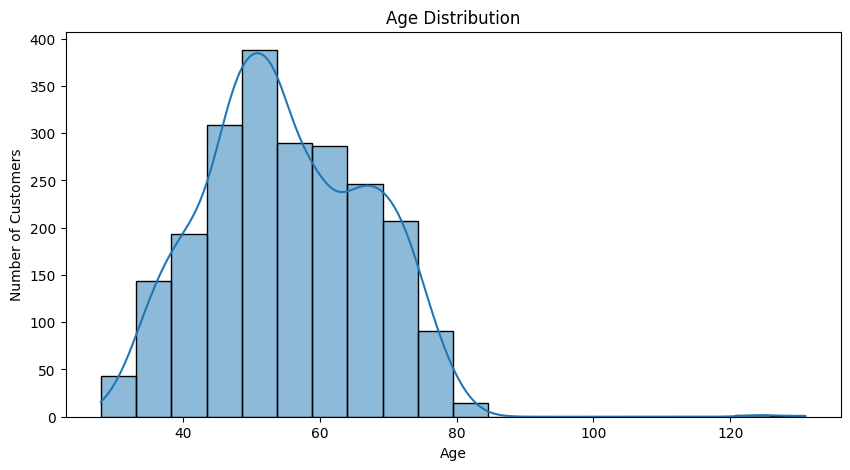

In [95]:
# Create a Histrogram of the Age Distribution
plt.figure(figsize=(10, 5))
sns.histplot(customer_df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

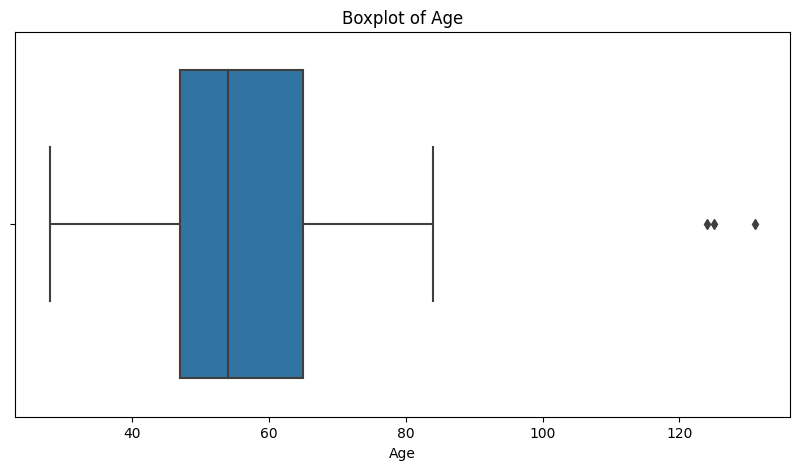

In [96]:
# Create Boxplot Diagram of the Age Distribution
plt.figure(figsize=(10, 5))
sns.boxplot(x=customer_df['Age'])
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

The age distribution plots shows that there are several outliers that will need to be removed

In [97]:
# Identifying Outliers in Age
Q1_age = customer_df['Age'].quantile(0.25)
Q3_age = customer_df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
age_outliers = customer_df[(customer_df['Age'] < (Q1_age - 1.5 * IQR_age)) | (customer_df['Age'] > (Q3_age + 1.5 * IQR_age))]

print("Outliers in Age:")
print(age_outliers['Age'])

Outliers in Age:
192    124
239    131
339    125
Name: Age, dtype: int64


In [98]:
customer_df = customer_df.drop(index=age_outliers.index)
len(customer_df)

2213

In [99]:
customer_df.reset_index(drop=True, inplace=True)

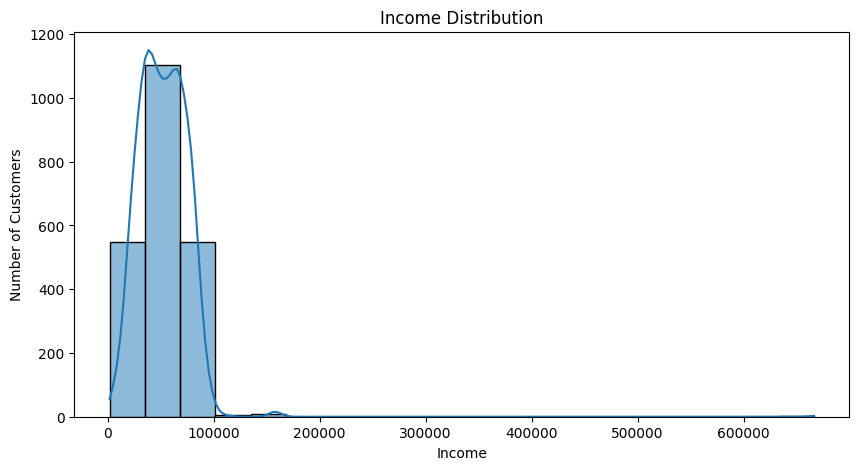

In [100]:
# Create a Histogram of the Income Distribution
plt.figure(figsize=(10, 5))
sns.histplot(customer_df['Income'].dropna(), bins=20, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Number of Customers')
plt.show()

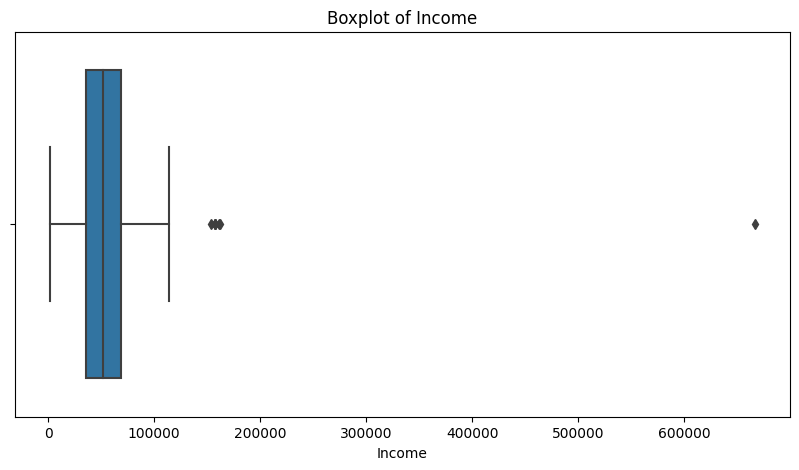

In [101]:
# Create Boxplot Diagram of the Income Distribution
plt.figure(figsize=(10, 5))
sns.boxplot(x=customer_df['Income'].dropna())
plt.title('Boxplot of Income')
plt.xlabel('Income')
plt.show()

It could also be seen that there are clear outliers for the income distribution, and thus should also be removed

In [102]:
# Identifying outliers in Income
Q1_income = customer_df['Income'].quantile(0.25)
Q3_income = customer_df['Income'].quantile(0.75)
IQR_income = Q3_income - Q1_income
income_outliers = customer_df[(customer_df['Income'] < (Q1_income - 1.5 * IQR_income)) | (customer_df['Income'] > (Q3_income + 1.5 * IQR_income))]

print("Outliers in Income:")
print(income_outliers['Income'])

Outliers in Income:
153     157243.0
601     162397.0
639     153924.0
671     160803.0
1284    157733.0
1633    157146.0
2106    156924.0
2206    666666.0
Name: Income, dtype: float64


Removing outliers in income may not be as straight forward because it might just be that the family's household income is well above the average range. 

However, index 2206, with an income of 666666, is more likely to be an error in data inputing and thus would be safe to remove

In [103]:
customer_df = customer_df.drop(index=2206)
len(customer_df)

2212

In [104]:
customer_df.reset_index(drop=True, inplace=True)

In [105]:
# Combine the number of kids and teenagers as one to reduce dimensionality
customer_df['Children'] = customer_df['Kidhome'] + customer_df['Teenhome']

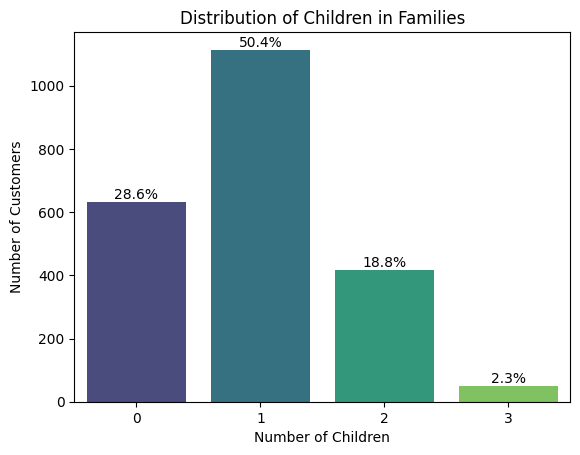

In [106]:
ax_childDist = sns.countplot(x='Children', data=customer_df, palette='viridis')
add_percentages(ax_childDist, customer_df, 'Children')
plt.title('Distribution of Children in Families')
plt.xlabel('Number of Children')
plt.ylabel('Number of Customers')
plt.show()

### Product Purchase Analysis

In this section, the spending patterns of the customers on different products will be analyzed.

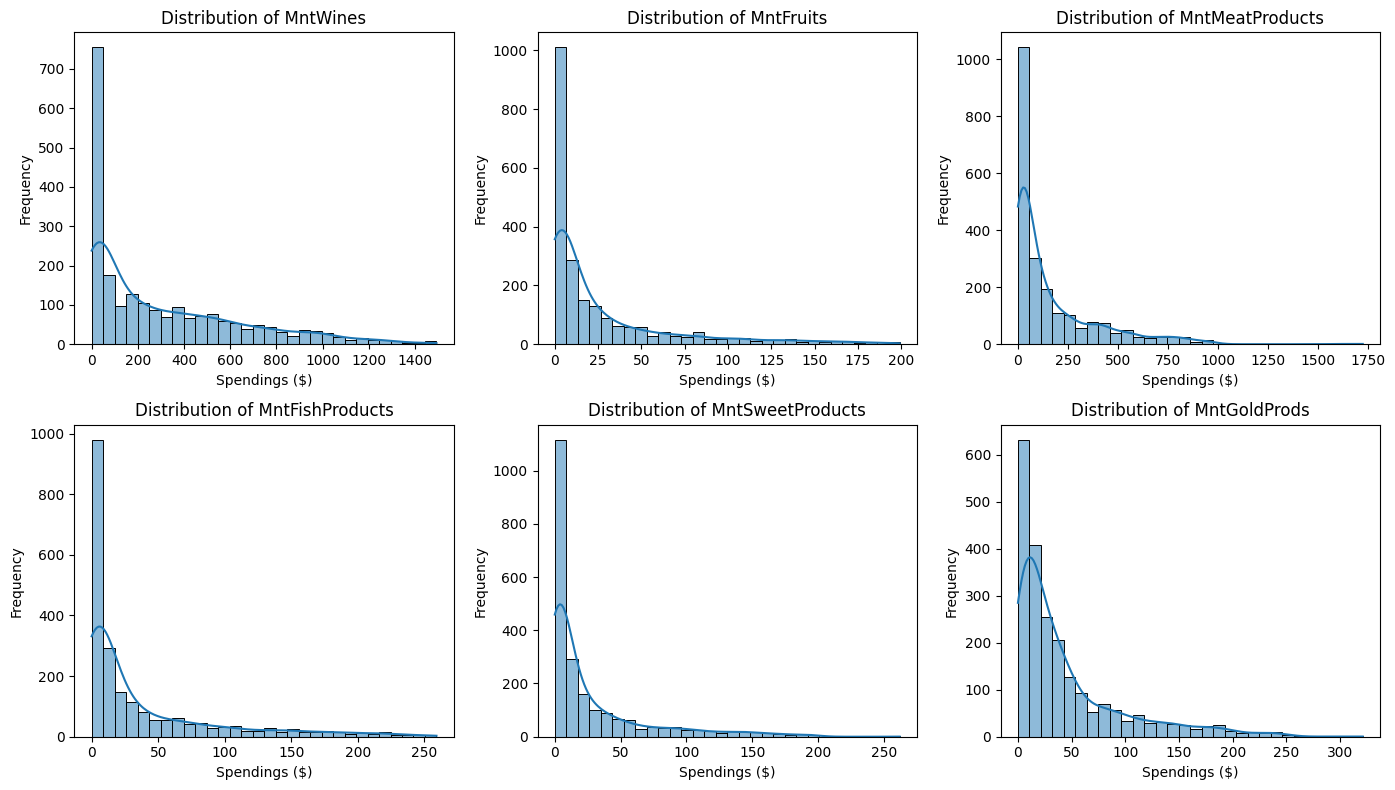

In [107]:
# List of product-related columns
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Plotting the distribution of spending on each product category
plt.figure(figsize=(14, 8))

for i, col in enumerate(product_columns):
    plt.subplot(2, 3, i + 1)  # Create subplots (2 rows, 3 columns)
    sns.histplot(customer_df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Spendings ($)')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Generally, it could be seen that the distribution of spending on all product categories is highly right-skewed. This means that most customers spend a relatively low amount, with fewer customers spending higher amounts.

In [108]:
# Create a new column for total spending
customer_df['Total_Spending'] = customer_df[product_columns].sum(axis=1)

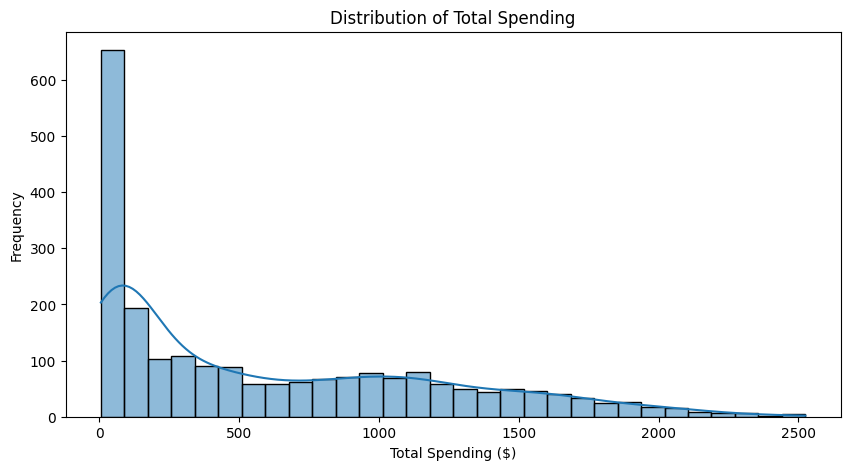

In [109]:
# Plot the distribution of Total Spending
plt.figure(figsize=(10, 5))
sns.histplot(customer_df['Total_Spending'], kde=True, bins=30)
plt.title('Distribution of Total Spending')
plt.xlabel('Total Spending ($)')
plt.ylabel('Frequency')
plt.show()

### Promotional Response Analysis

In this section, the campaign effectiveness, based on how many customers responded to each campaign, as well as the number of purchases made with a discount will be analysed

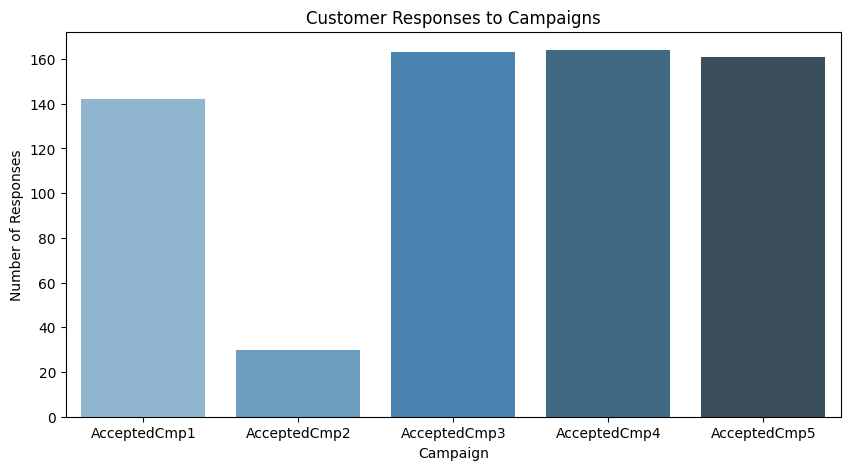

The most effective campaign is: AcceptedCmp4 with 164 responses.


In [110]:
# Calculate the number of responses to each campaign
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
campaign_responses = customer_df[campaign_cols].sum()

# Plot the responses for each campaign
plt.figure(figsize=(10, 5))
sns.barplot(x=campaign_responses.index, y=campaign_responses.values, palette="Blues_d")
plt.title('Customer Responses to Campaigns')
plt.xlabel('Campaign')
plt.ylabel('Number of Responses')
plt.show()

most_effective_campaign = campaign_responses.idxmax()
print(f"The most effective campaign is: {most_effective_campaign} with {campaign_responses.max()} responses.")

In [111]:
# Create a column for the total accepted campaigns
customer_df['Total_Accepted_Campaigns'] = customer_df[campaign_cols].sum(axis=1)

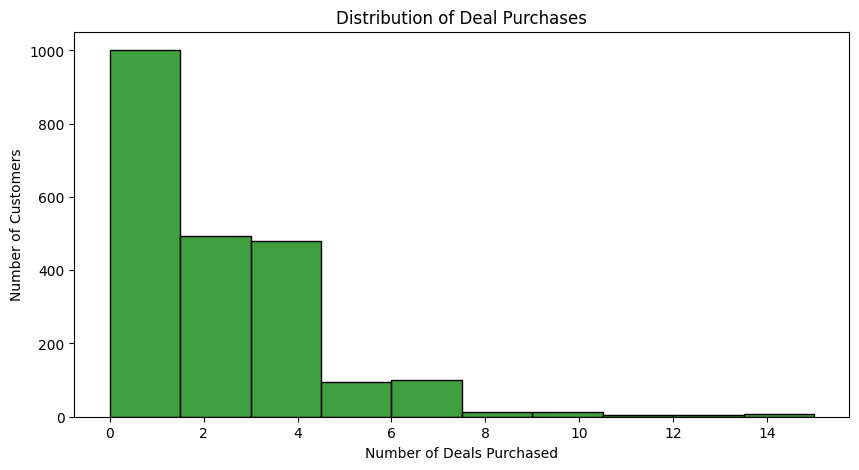

Deal Purchase Statistics:
count    2212.000000
mean        2.324593
std         1.924507
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: NumDealsPurchases, dtype: float64


In [112]:
# Plot the distribution of the number of deals purchased
plt.figure(figsize=(10, 5))
sns.histplot(customer_df['NumDealsPurchases'], kde=False, bins=10, color='green')
plt.title('Distribution of Deal Purchases')
plt.xlabel('Number of Deals Purchased')
plt.ylabel('Number of Customers')
plt.show()

# Analyze the impact of deal purchases
deal_purchase_stats = customer_df['NumDealsPurchases'].describe()
print("Deal Purchase Statistics:")
print(deal_purchase_stats)

### Purchase Channel Analysis

In this section, the number of purchases made via different channels will be analysed

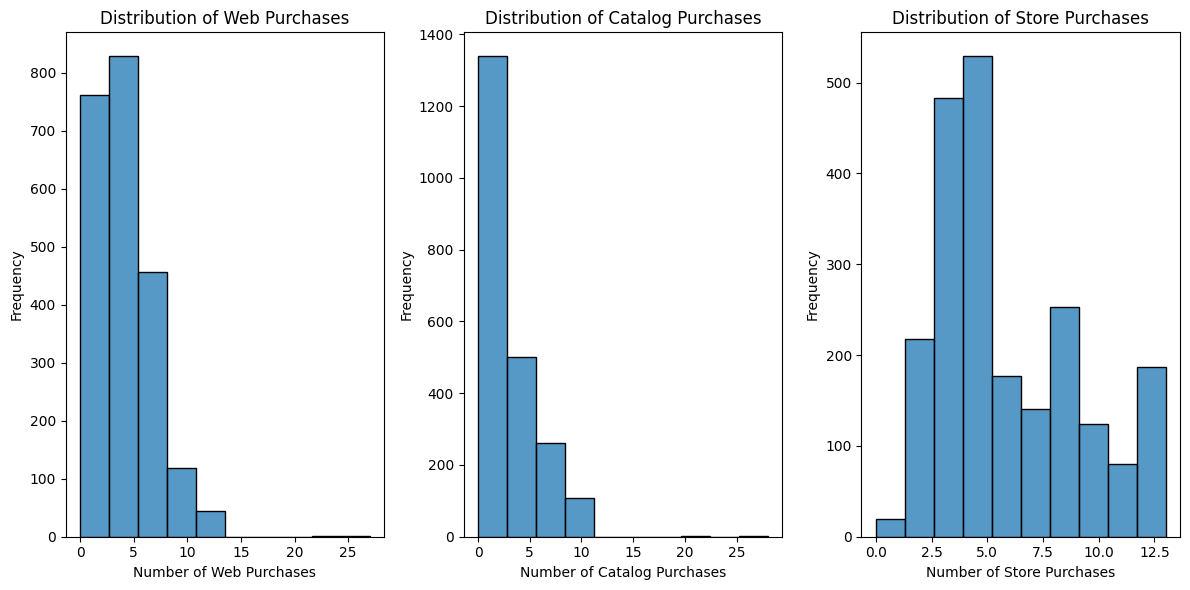

In [113]:
plt.figure(figsize=(12, 6))

# Plot the distribution of web purchases
plt.subplot(1, 3, 1)
sns.histplot(customer_df['NumWebPurchases'], kde=False, bins=10)
plt.title('Distribution of Web Purchases')
plt.xlabel('Number of Web Purchases')
plt.ylabel('Frequency')

# Plot the distribution of catalog purchases
plt.subplot(1, 3, 2)
sns.histplot(customer_df['NumCatalogPurchases'], kde=False, bins=10)
plt.title('Distribution of Catalog Purchases')
plt.xlabel('Number of Catalog Purchases')
plt.ylabel('Frequency')

# Plot the distribution of store purchases
plt.subplot(1, 3, 3)
sns.histplot(customer_df['NumStorePurchases'], kde=False, bins=10)
plt.title('Distribution of Store Purchases')
plt.xlabel('Number of Store Purchases')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()

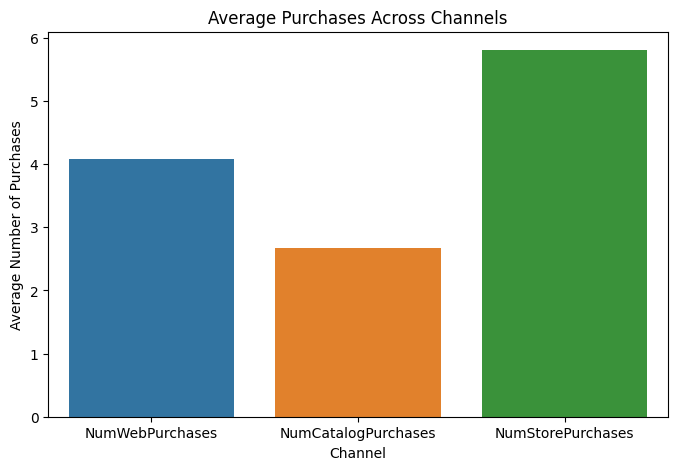

In [114]:
channel_columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# Calculate the mean purchases for each channel
mean_purchases = customer_df[channel_columns].mean()

# Plot the average purchases across channels
plt.figure(figsize=(8, 5))
sns.barplot(x=mean_purchases.index, y=mean_purchases.values)
plt.title('Average Purchases Across Channels')
plt.xlabel('Channel')
plt.ylabel('Average Number of Purchases')
plt.show()

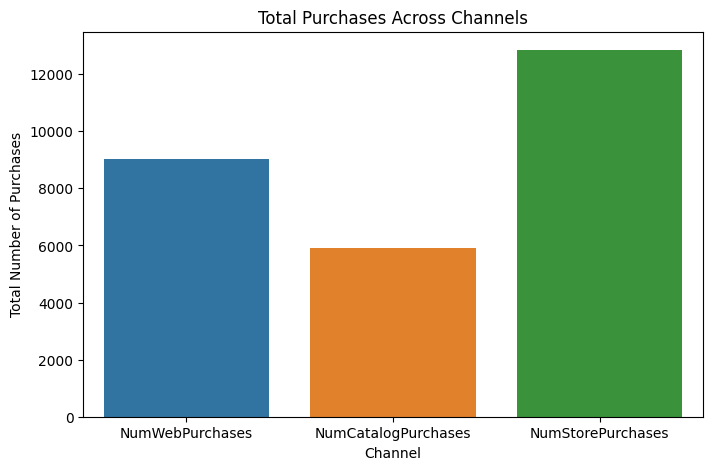

In [115]:
# Sum the total purchases for each channel
total_purchases = customer_df[channel_columns].sum()

# Plot the total purchases across channels
plt.figure(figsize=(8, 5))
sns.barplot(x=total_purchases.index, y=total_purchases.values)
plt.title('Total Purchases Across Channels')
plt.xlabel('Channel')
plt.ylabel('Total Number of Purchases')
plt.show()

In [116]:
# Create a column for the total accepted campaigns
customer_df['Total_Purchases'] = customer_df[channel_columns].sum(axis=1)

# Bivariate Analysis

In [117]:
customer_df_cleaned = customer_df.copy()

In [118]:
customer_df_cleaned.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Days_Enrolled', 'Age',
       'Children', 'Total_Spending', 'Total_Accepted_Campaigns',
       'Total_Purchases'],
      dtype='object')

In [119]:
# Drop the unneccessary features
cols_to_del = ['ID', 'Year_Birth', 'Dt_Customer','Kidhome', 'Teenhome']
customer_df_cleaned = customer_df_cleaned.drop(cols_to_del, axis=1)

In [120]:
customer_df_cleaned.head()

Education Marital_Status   Income  Recency  MntWines  MntFruits  \
0  Higher Education         Single  58138.0       58       635         88   
1  Higher Education         Single  46344.0       38        11          1   
2  Higher Education   Relationship  71613.0       26       426         49   
3  Higher Education   Relationship  26646.0       26        11          4   
4  Higher Education   Relationship  58293.0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0              546              172                88            88  ...   
1                6                2                 1             6  ...   
2              127              111                21            42  ...   
3               20               10                 3             5  ...   
4              118               46                27            15  ...   

   AcceptedCmp1  AcceptedCmp2  Complain  Response  Days_Enrolled  Age  \
0             0             0         0         1           4136   67   
1             0             0         0         0           3586   70   
2             0             0         0         0           3785   59   
3             0             0         0         0           3612   40   
4             0             0         0         0           3634   43   

   Children  Total_Spending  Total_Accepted_Campaigns  Total_Purchases  
0         0            1617                         0               22  
1         2              27                         0                4  
2         0             776                         0               20  
3         1              53                         0                6  
4         1             422                         0               14  

[5 rows x 28 columns]

In [121]:
from sklearn.preprocessing import LabelEncoder

# Label encoding of categorical features
labelEncoder = LabelEncoder()
for i in ['Education', 'Marital_Status']:
    customer_df_cleaned[i] = customer_df_cleaned[[i]].apply(labelEncoder.fit_transform)

Label Encodings:

0: Basic Education and Relationship

1: Higher Education and Single

In [122]:
customer_df_cleaned.head()

Education  Marital_Status   Income  Recency  MntWines  MntFruits  \
0          1               1  58138.0       58       635         88   
1          1               1  46344.0       38        11          1   
2          1               0  71613.0       26       426         49   
3          1               0  26646.0       26        11          4   
4          1               0  58293.0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0              546              172                88            88  ...   
1                6                2                 1             6  ...   
2              127              111                21            42  ...   
3               20               10                 3             5  ...   
4              118               46                27            15  ...   

   AcceptedCmp1  AcceptedCmp2  Complain  Response  Days_Enrolled  Age  \
0             0             0         0         1           4136   67   
1             0             0         0         0           3586   70   
2             0             0         0         0           3785   59   
3             0             0         0         0           3612   40   
4             0             0         0         0           3634   43   

   Children  Total_Spending  Total_Accepted_Campaigns  Total_Purchases  
0         0            1617                         0               22  
1         2              27                         0                4  
2         0             776                         0               20  
3         1              53                         0                6  
4         1             422                         0               14  

[5 rows x 28 columns]

<Axes: >

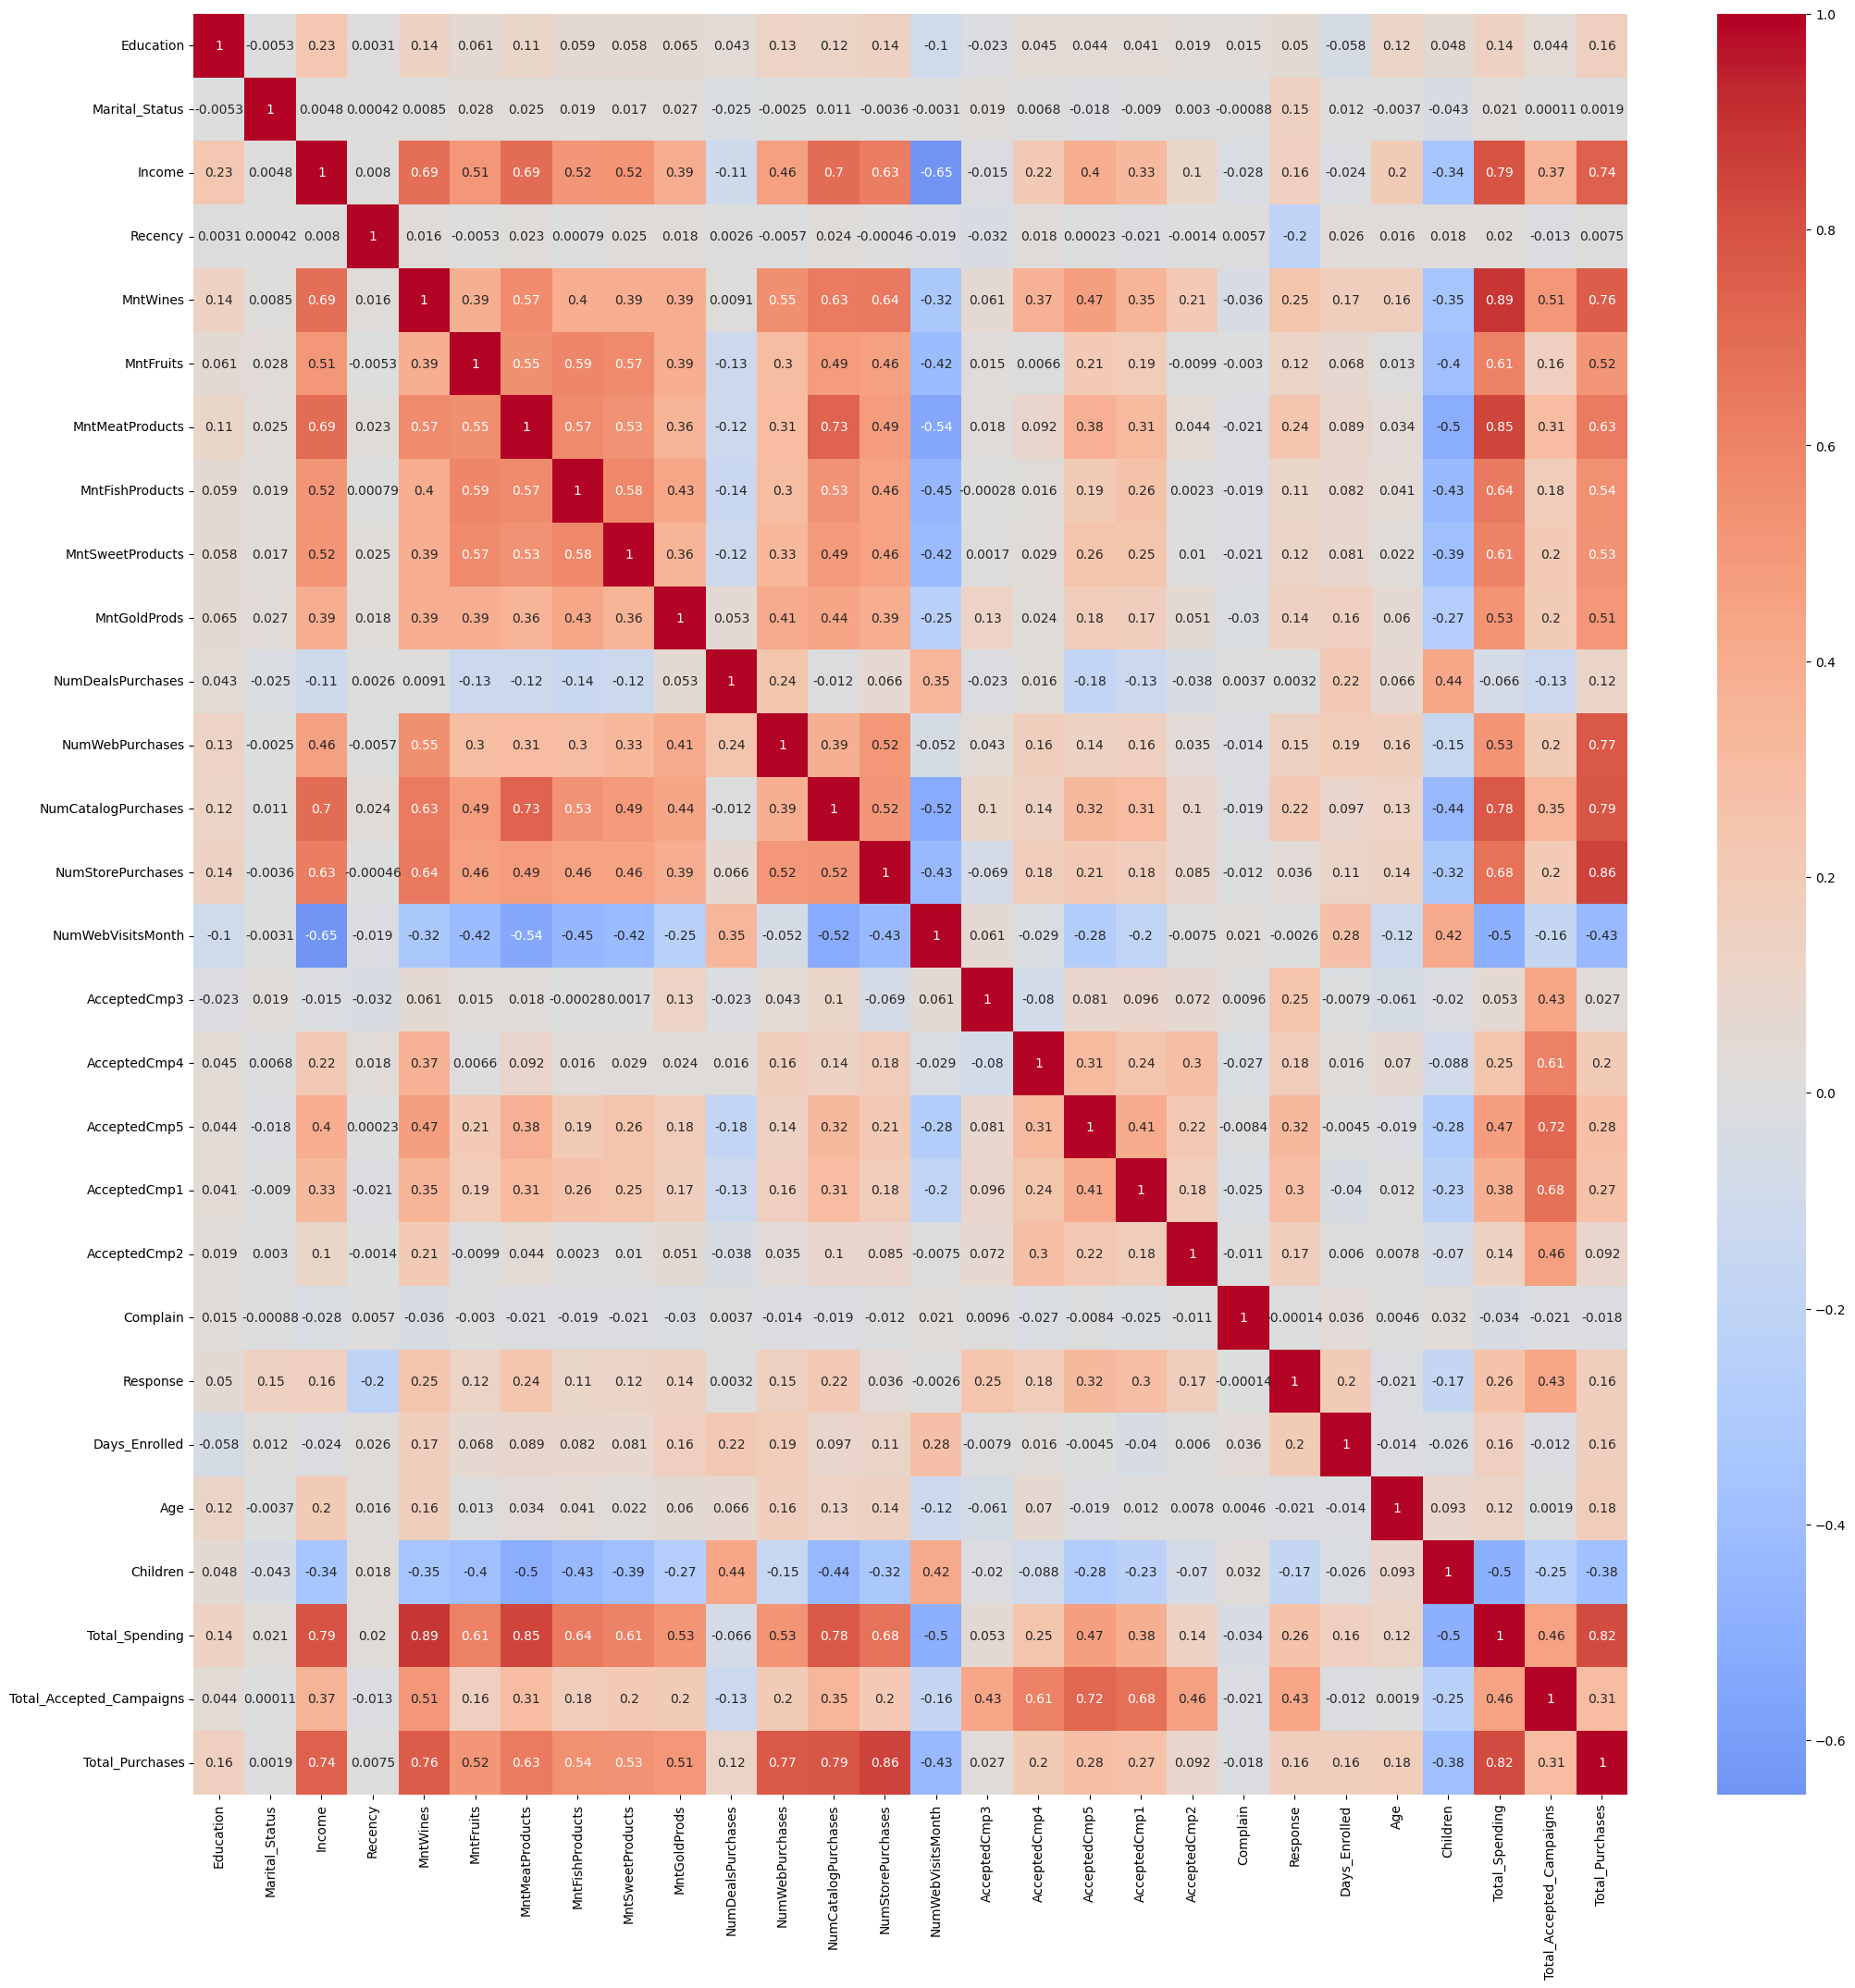

In [123]:
corrmat= customer_df_cleaned.corr()
plt.figure(figsize=(25,25))  
sns.heatmap(corrmat,annot=True, cmap='coolwarm', center=0)

The Complain feature has very low correlations with other features and therefore it can be removed

In [124]:
customer_df_cleaned.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Days_Enrolled', 'Age',
       'Children', 'Total_Spending', 'Total_Accepted_Campaigns',
       'Total_Purchases'],
      dtype='object')

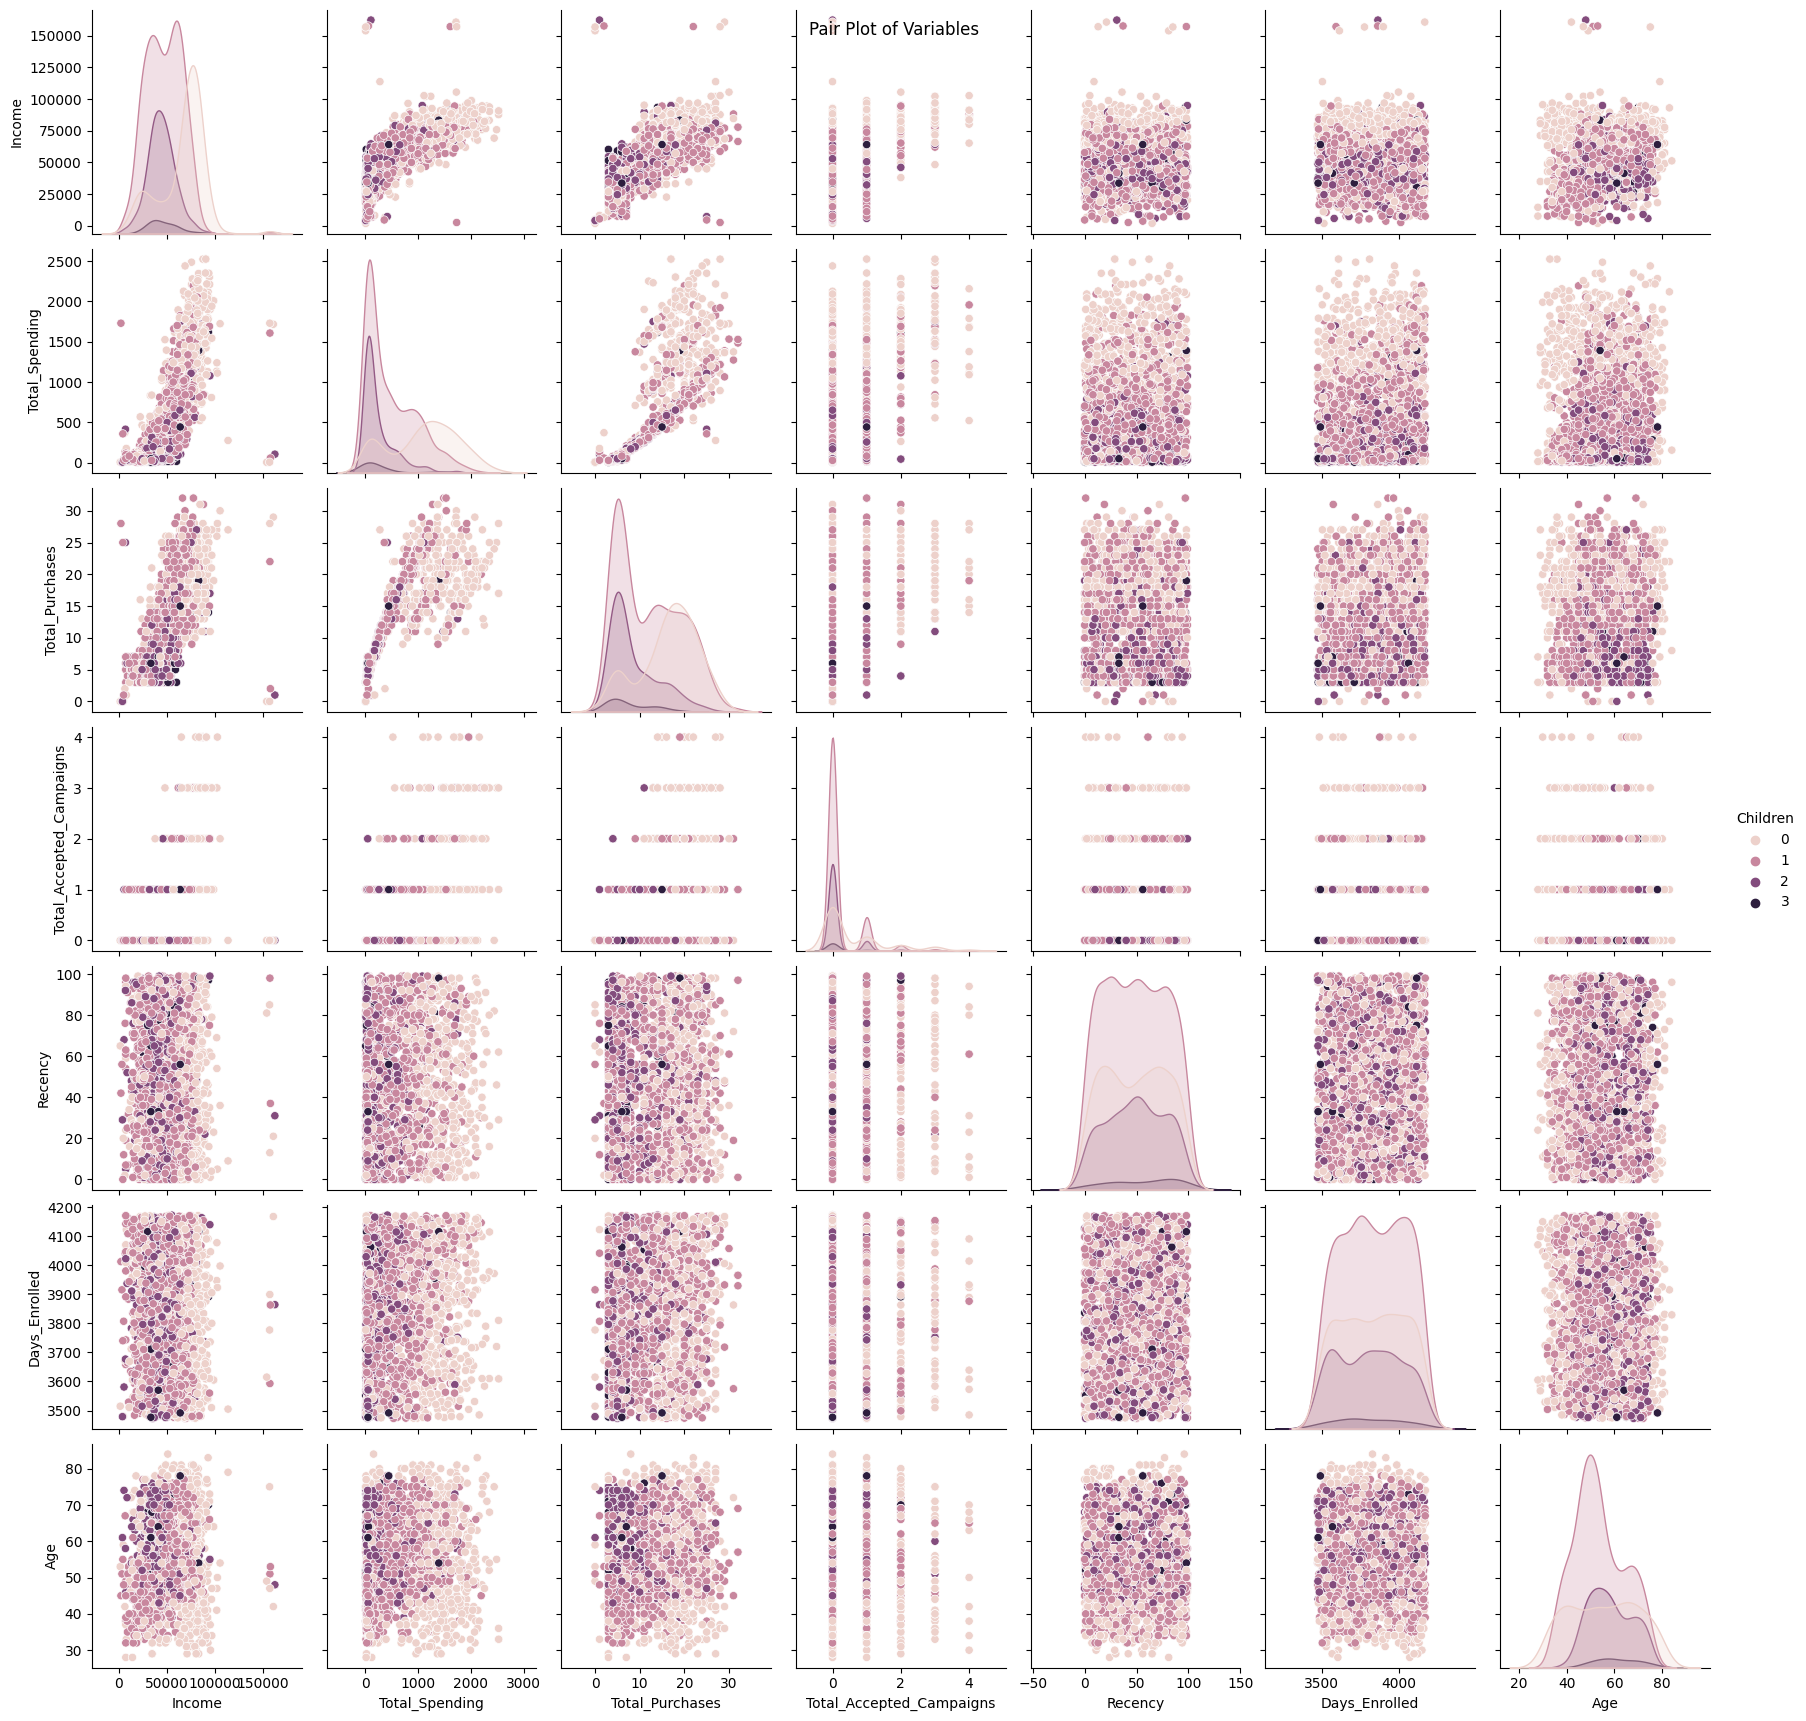

In [125]:
pairplot_columns = [
    'Income', 'Total_Spending', 'Total_Purchases',
    'Total_Accepted_Campaigns', 'Recency', 'Days_Enrolled',
    'Age', 'Children', 'Education'
]

sns.pairplot(customer_df[pairplot_columns], hue='Children')
plt.suptitle('Pair Plot of Variables')
plt.show()

# Data Preprocessing

In this section, the data will be scaled and a PCA will be performed for dimensionality reduction

In [126]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [127]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_df_cleaned)
scaled_df = pd.DataFrame(scaled_data, columns=customer_df_cleaned.columns)

In [128]:
scaled_df.head()

Education  Marital_Status    Income   Recency  MntWines  MntFruits  \
0   0.158187        1.349603  0.287105  0.310353  0.977660   1.552041   
1   0.158187        1.349603 -0.260882 -0.380813 -0.872618  -0.637461   
2   0.158187       -0.740959  0.913196 -0.795514  0.357935   0.570540   
3   0.158187       -0.740959 -1.176114 -0.795514 -0.872618  -0.561961   
4   0.158187       -0.740959  0.294307  1.554453 -0.392257   0.419540   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0         1.690293         2.453472          1.483713      0.852576  ...   
1        -0.718230        -0.651004         -0.634019     -0.733642  ...   
2        -0.178542         1.339513         -0.147184     -0.037254  ...   
3        -0.655787        -0.504911         -0.585335     -0.752987  ...   
4        -0.218684         0.152508         -0.001133     -0.559545  ...   

   AcceptedCmp1  AcceptedCmp2  Complain  Response  Days_Enrolled       Age  \
0     -0.261914     -0.117256  -0.09552  2.375425       1.527721  1.018352   
1     -0.261914     -0.117256  -0.09552 -0.420977      -1.189011  1.274785   
2     -0.261914     -0.117256  -0.09552 -0.420977      -0.206048  0.334530   
3     -0.261914     -0.117256  -0.09552 -0.420977      -1.060584 -1.289547   
4     -0.261914     -0.117256  -0.09552 -0.420977      -0.951915 -1.033114   

   Children  Total_Spending  Total_Accepted_Campaigns  Total_Purchases  
0 -1.264598        1.676245                  -0.43916         1.309461  
1  1.404572       -0.963297                  -0.43916        -1.189221  
2 -1.264598        0.280110                  -0.43916         1.031830  
3  0.069987       -0.920135                  -0.43916        -0.911590  
4  0.069987       -0.307562                  -0.43916         0.198936  

[5 rows x 28 columns]

In [129]:
# Apply PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_df)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

In [130]:
pca_df.head()

PC1       PC2       PC3
0  4.258132 -1.362161  1.079668
1 -2.890932  0.121278 -0.693866
2  1.777184 -1.485993 -0.180192
3 -2.813386  0.195695 -1.070034
4 -0.363625 -0.978975  0.204168

In [131]:
import plotly.express as px

In [132]:
pca_df_plot = pca_df.copy()
pca_df_plot['Children'] = customer_df['Children']

In [133]:
# Interactive 3D plot
fig = px.scatter_3d(
    pca_df_plot, 
    x='PC1', 
    y='PC2', 
    z='PC3', 
    color='Children', 
    title='3D PCA of Customer Data',
    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'},
)

# Show the plot
fig.show()

# Clustering

In this section, the Elbow Method will be conducted to determine the optimum number of clusters and three clustering methods (K-Means Clustering, DBSCAN and Hierarchical Clustering) will be performed and evaluated to determine the best approach to take for this application

In [134]:
from sklearn.cluster import KMeans

**Elbow Method**

In [135]:
# Perform K-Means on PCA data
wcss = []

k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)

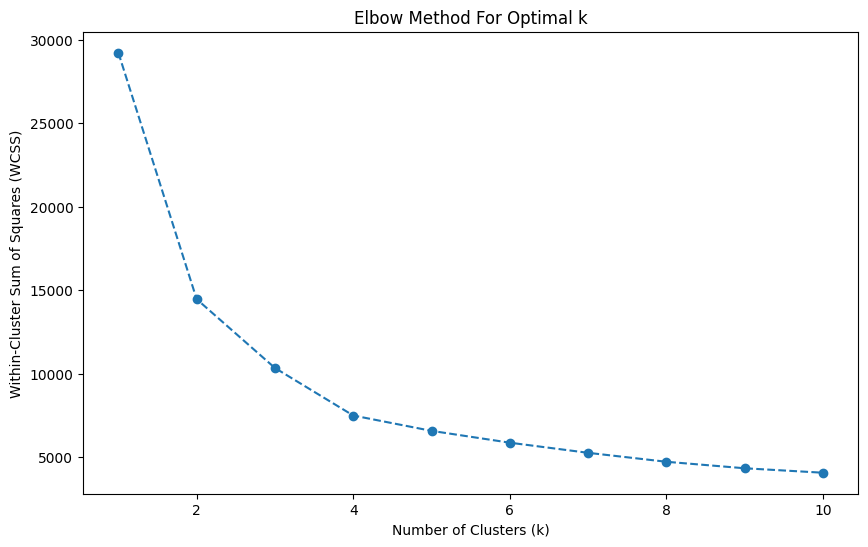

In [136]:
# Plot the Elbow Method results
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

Using the elbow method, 4 clusters will be used.

Next, different unsupervised learning algorithms will be compared to determine which will be the best one

**K-Means Clustering**

In [137]:
# Create a KMeans instance with the specified number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the model to the PCA data
kmeans_labels = kmeans.fit_predict(pca_df)

**DBSCAN**

In [138]:
from sklearn.cluster import DBSCAN

In [139]:
# Create and fit the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(pca_df)

**Hierarchical Clustering**

In [140]:
from scipy.cluster.hierarchy import linkage, fcluster

In [141]:
# Perform hierarchical clustering
Z = linkage(pca_df, method='ward')
hierarchical_labels = fcluster(Z, t=4, criterion='maxclust')

**Evaluate Clustering Methods**

In [142]:
pca_df_analyse = pca_df.copy()
pca_df_analyse['Cluster_KMeans'] = kmeans_labels
pca_df_analyse['Cluster_DBSCAN'] = dbscan_labels
pca_df_analyse['Cluster_Hierarchical'] = hierarchical_labels

Evaluation 1: Silhouette Score

This metric measures how similar an object is to its own cluster compared to other clusters. Higher scores indicate better-defined clusters.

In [143]:
from sklearn.metrics import silhouette_score

In [144]:
# Compute silhouette scores
kmeans_silhouette = silhouette_score(pca_df_analyse[['PC1', 'PC2', 'PC3']], kmeans_labels)
dbscan_silhouette = silhouette_score(pca_df_analyse[['PC1', 'PC2', 'PC3']], dbscan_labels)
hierarchical_silhouette = silhouette_score(pca_df_analyse[['PC1', 'PC2', 'PC3']], hierarchical_labels)

print(f"K-Means Silhouette Score: {kmeans_silhouette}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
print(f"Hierarchical Silhouette Score: {hierarchical_silhouette}")

K-Means Silhouette Score: 0.4446593504857192
DBSCAN Silhouette Score: -0.3429903646514787
Hierarchical Silhouette Score: 0.36502820136208336


Evaluation 2: Davies-Bouldin Index

This metric measures the average similarity ratio of each cluster with the cluster that is most similar to it. Lower scores indicate better clustering.

In [145]:
from sklearn.metrics import davies_bouldin_score

In [146]:
# Compute Davies-Bouldin index
kmeans_db_index = davies_bouldin_score(pca_df_analyse[['PC1', 'PC2', 'PC3']], kmeans_labels)
dbscan_db_index = davies_bouldin_score(pca_df_analyse[['PC1', 'PC2', 'PC3']], dbscan_labels)  # Note: DBSCAN might produce -1 for noise points
hierarchical_db_index = davies_bouldin_score(pca_df_analyse[['PC1', 'PC2', 'PC3']], hierarchical_labels)

print(f"K-Means Davies-Bouldin Index: {kmeans_db_index}")
print(f"DBSCAN Davies-Bouldin Index: {dbscan_db_index}")
print(f"Hierarchical Davies-Bouldin Index: {hierarchical_db_index}")

K-Means Davies-Bouldin Index: 0.8979223096018044
DBSCAN Davies-Bouldin Index: 1.764333885884589
Hierarchical Davies-Bouldin Index: 1.0469305412987544


Evaluation 3: Visualize Clustering Results

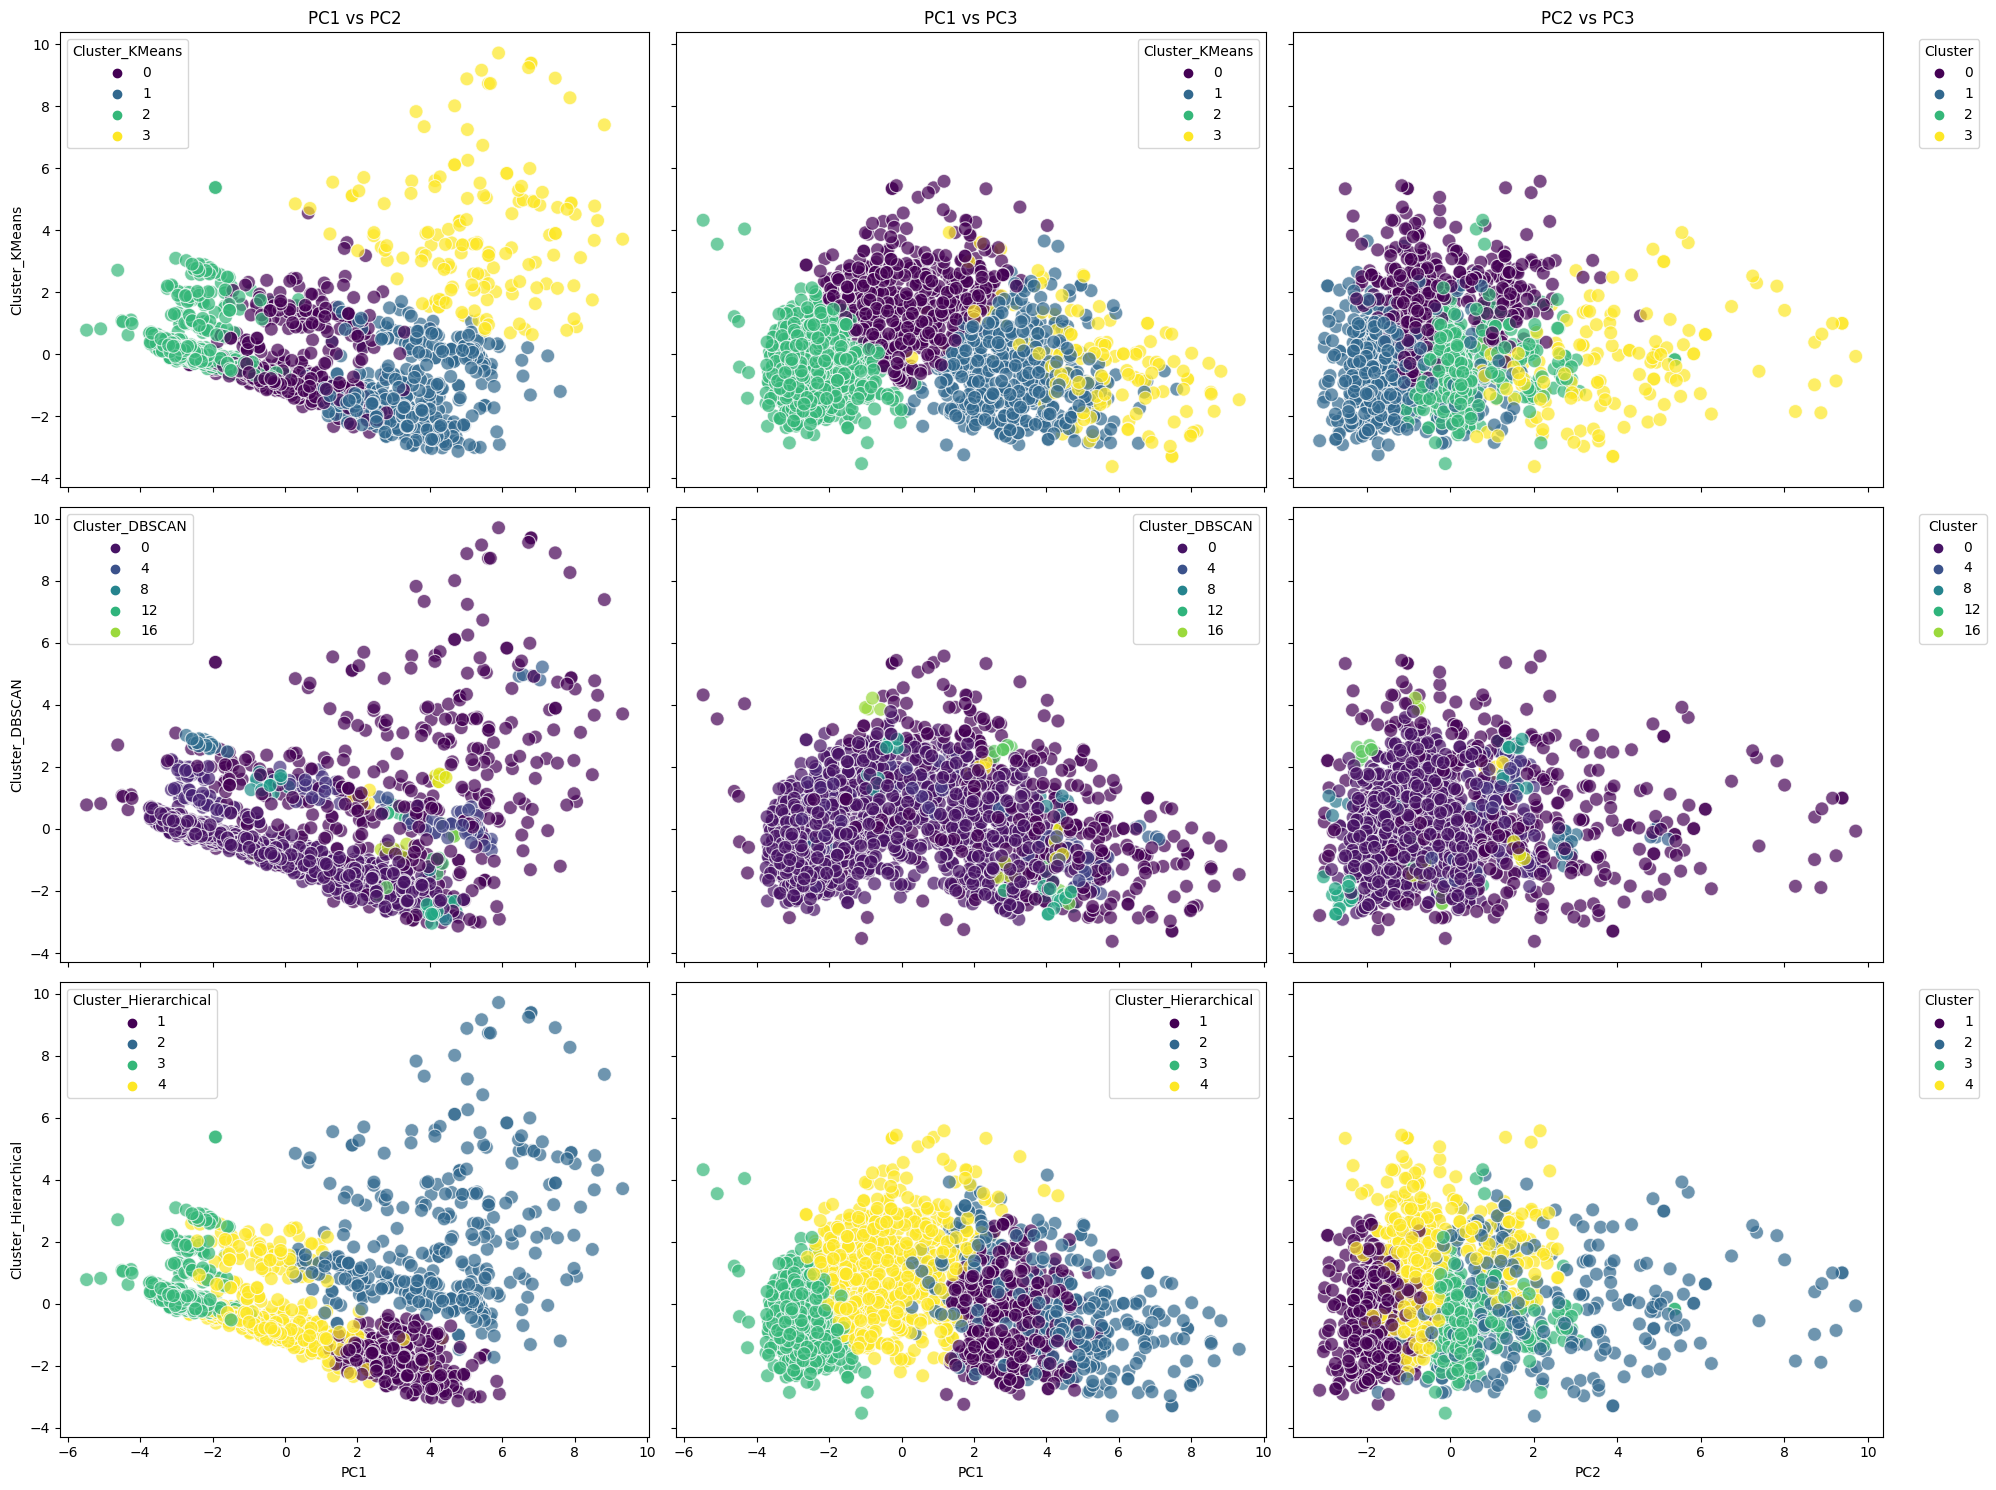

In [147]:
clusters = ['Cluster_KMeans', 'Cluster_DBSCAN', 'Cluster_Hierarchical']
pairings = [('PC1', 'PC2'), ('PC1', 'PC3'), ('PC2', 'PC3')]

fig, axs = plt.subplots(len(clusters), len(pairings), figsize=(20, 15), sharex='col', sharey='row')

# Loop through each cluster method and pairing
for i, cluster in enumerate(clusters):
    for j, (x, y) in enumerate(pairings):
        sns.scatterplot(x=x, y=y, hue=cluster, data=pca_df_analyse, palette='viridis', s=100, alpha=0.7, ax=axs[i, j])
        if i == 0:  # Add titles to the top row
            axs[i, j].set_title(f'{x} vs {y}')
        if j == 0:  # Add y-labels to the first column
            axs[i, j].set_ylabel(cluster)
        if i == len(clusters) - 1:  # Add x-labels to the last row
            axs[i, j].set_xlabel(f'{x}')
        if j == len(pairings) - 1:  # Add legends to the last column
            axs[i, j].legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

From the evaluations performed, it could be seen that the metrics for K-Means Clustering performs much better when compared to the other two clustering methods.

Furthermore, it could be inspected from the scatter plots that K-Means Clustering and Hierarchical Clustering were able to perform clear clustering of the data.

Therefore, since **K-Means Clustering** outperforms the other clustering methods, it is the chosen method of unsupervised learning.

# Cluster Profiling

In this section, an in-depth analysis of each cluster will be performed to understand the characteristics of the customers in each cluster to provide better business decisions

In [148]:
customer_df_cleaned['Cluster_KMeans'] = kmeans_labels

customer_df_cleaned.head()

Education  Marital_Status   Income  Recency  MntWines  MntFruits  \
0          1               1  58138.0       58       635         88   
1          1               1  46344.0       38        11          1   
2          1               0  71613.0       26       426         49   
3          1               0  26646.0       26        11          4   
4          1               0  58293.0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0              546              172                88            88  ...   
1                6                2                 1             6  ...   
2              127              111                21            42  ...   
3               20               10                 3             5  ...   
4              118               46                27            15  ...   

   AcceptedCmp2  Complain  Response  Days_Enrolled  Age  Children  \
0             0         0         1           4136   67         0   
1             0         0         0           3586   70         2   
2             0         0         0           3785   59         0   
3             0         0         0           3612   40         1   
4             0         0         0           3634   43         1   

   Total_Spending  Total_Accepted_Campaigns  Total_Purchases  Cluster_KMeans  
0            1617                         0               22               1  
1              27                         0                4               2  
2             776                         0               20               1  
3              53                         0                6               2  
4             422                         0               14               0  

[5 rows x 29 columns]

In [149]:
customer_df_cleaned.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Days_Enrolled', 'Age',
       'Children', 'Total_Spending', 'Total_Accepted_Campaigns',
       'Total_Purchases', 'Cluster_KMeans'],
      dtype='object')

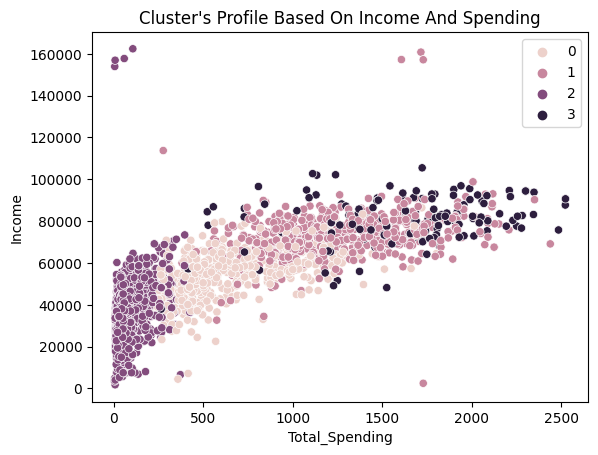

In [150]:
pl = sns.scatterplot(data = customer_df_cleaned,x=customer_df_cleaned["Total_Spending"], y=customer_df_cleaned["Income"],hue=customer_df_cleaned["Cluster_KMeans"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

Based on the Income vs Total Spending plots, several characteristics can be deduced about the clusters:

1. Cluster 0 (Light Pink):

   - Customers in this cluster have moderate incomes.
   - Their total spending is clustered more on the lower end.


2. Cluster 1 (Pink):

   - The incomes of these customers also have moderate incomes, but are generally on the higher end.
   - Their spending is also relatively high.


3. Cluster 2 (Purple):

   - These customers have incomes ranging from the lower to mid-range.
   - These customers also have the lowest spending out of the other clusters.


4. Cluster 3 (Dark Purple):

   - This cluster contains customers with higher incomes.
   - Their spending is generally higher compared to the rest as well.

To get a clearer view on the distribution of income and spending, box plots can be used

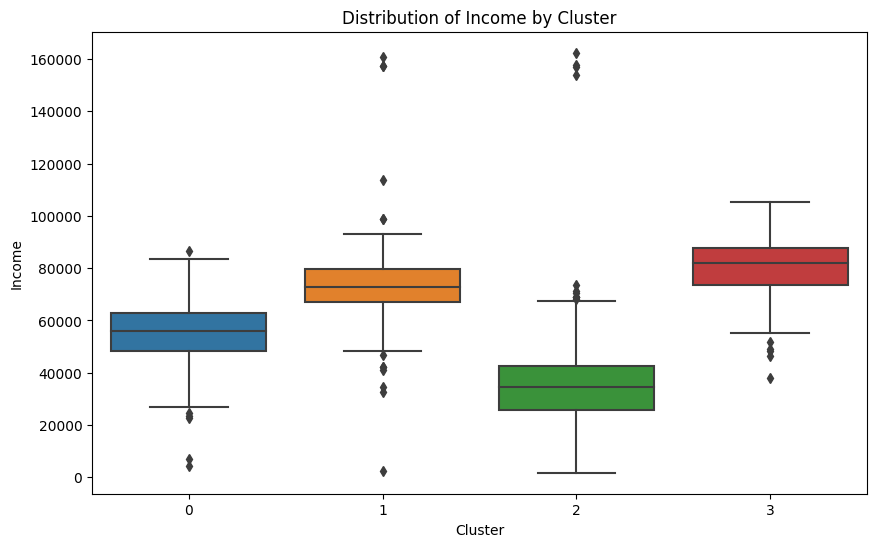

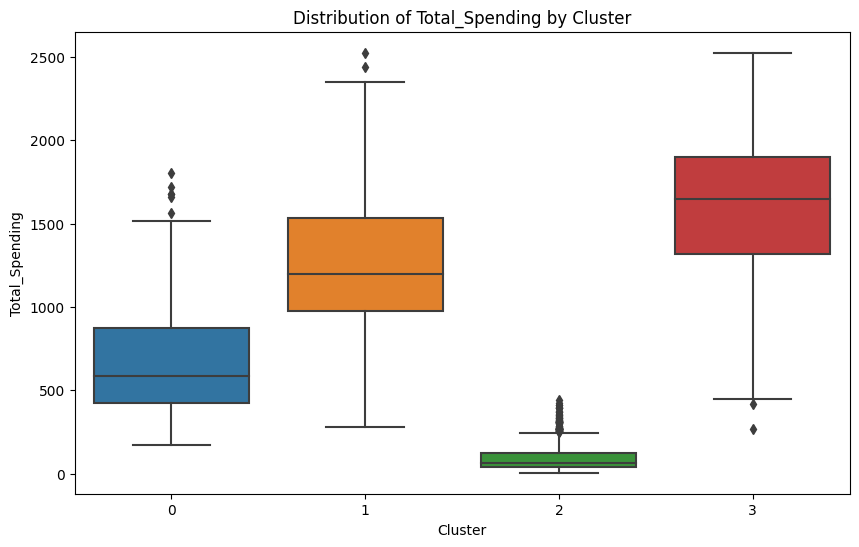

In [151]:
# Plot distributions of key features for each cluster
features_to_plot = ['Income', 'Total_Spending']

for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster_KMeans', y=feature, data=customer_df_cleaned)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

The box plots aligned with the deductions made from the scatter plot and can be summarised as below

**Cluster 2 < Cluster 0 < Cluster 1 < Cluster 3**

With Cluster 2 being the cluster with the lowest income and spending

Furthermore, other characteristics of the customers in each cluster will be investigated

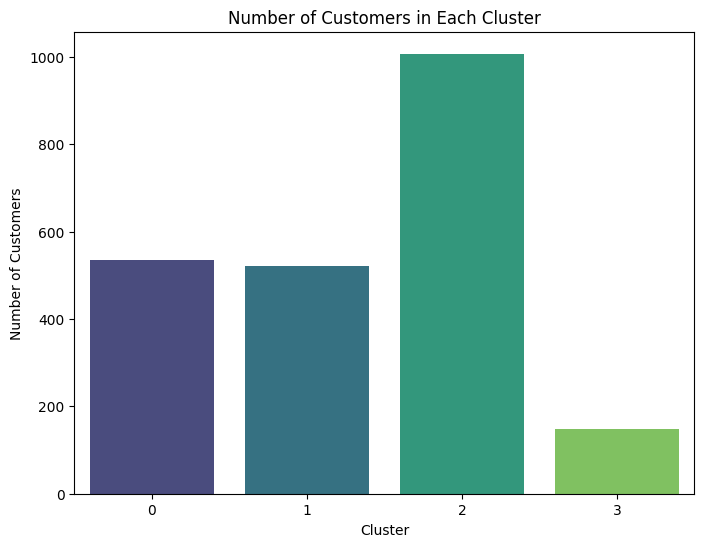

In [152]:
# Count the number of customers in each cluster
cluster_counts = customer_df_cleaned['Cluster_KMeans'].value_counts().reset_index()
cluster_counts.columns = ['Cluster_KMeans', 'Count']

plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster_KMeans', y='Count', data=cluster_counts, palette='viridis')

plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Number of Customers in Each Cluster')

plt.show()

It could be seen that the least number of customers is in Cluster 3, which could impact many decision-making process for the business, which will be discussed below.

Next, the promotional efforts (campaigns and discounted items) by the business will be analysed for each cluster

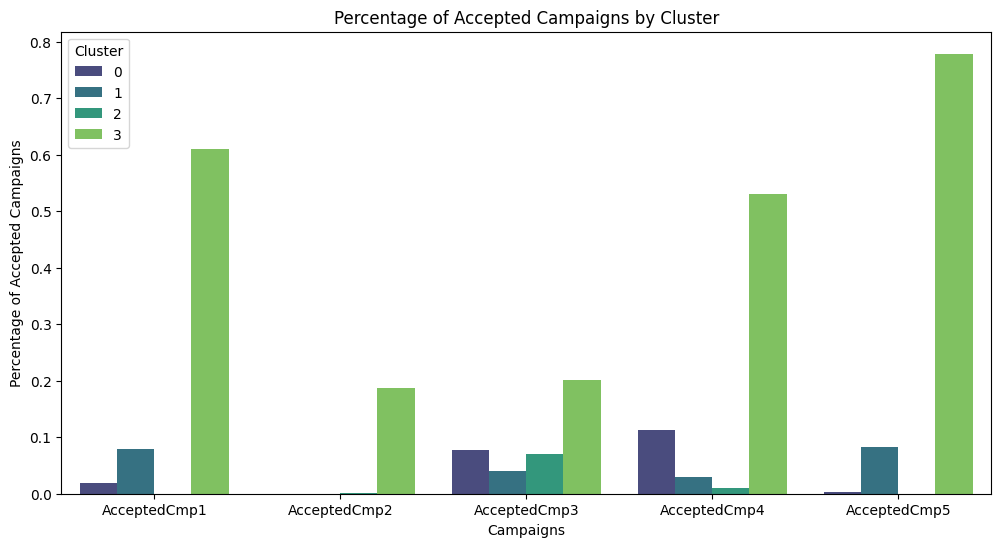

In [153]:
# List of campaigns
campaigns = ['AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Group by 'Cluster_KMeans' and calculate the sum of the accepted campaigns
grouped_data = customer_df_cleaned.groupby('Cluster_KMeans')[campaigns].mean().reset_index()

# Melt the DataFrame to a long format for easier plotting
melted_data = pd.melt(grouped_data, id_vars=['Cluster_KMeans'], value_vars=campaigns, var_name='Campaigns', value_name='Percentage of Accepted Campaigns')

# Plotting the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Campaigns', y='Percentage of Accepted Campaigns', hue='Cluster_KMeans', data=melted_data, palette='viridis')

# Adding labels and title
plt.xlabel('Campaigns')
plt.ylabel('Percentage of Accepted Campaigns')
plt.title('Percentage of Accepted Campaigns by Cluster')
plt.legend(title='Cluster')

# Show the plot
plt.show()

It could be seen that all the campaigns performed very poorly for Clusters 0, 1 and 2, but performed best on Cluster 3.

However, since it was found that Cluster 3 had the least number of customers, it would be wise to not focus on campaigns going forward as it would be a waste of costs, since the majority of their customers do not accept the campaigns.

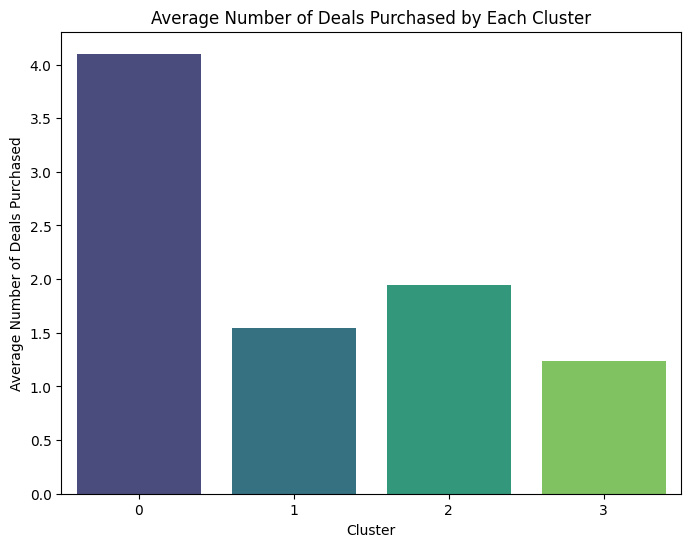

In [154]:
# Calculate the mean of 'NumDealsPurchases'
cluster_deals = customer_df_cleaned.groupby('Cluster_KMeans')['NumDealsPurchases'].mean().reset_index()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster_KMeans', y='NumDealsPurchases', data=cluster_deals, palette='viridis')

# Adding labels and title
plt.xlabel('Cluster')
plt.ylabel('Average Number of Deals Purchased')
plt.title('Average Number of Deals Purchased by Each Cluster')

# Show the plot
plt.show()

This time, it could be seen that discounted promotions perform much better compared to campaigns, and it also captured Cluster 0 the most, which is the cluster with the second most number of customers. Thus, the business may want to focus more on giving discounted promotions.

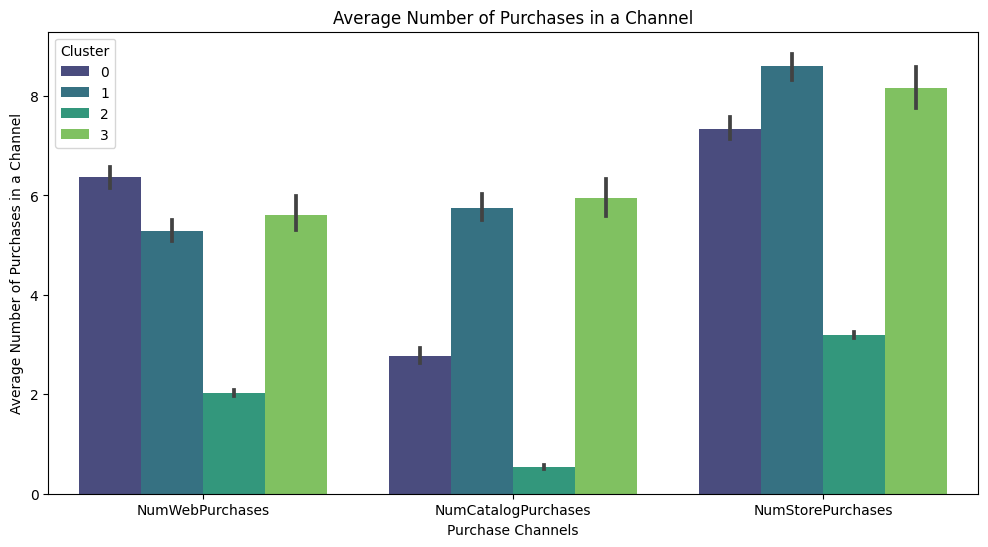

In [155]:
# List of campaigns done
purchase_channels = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

grouped_data = customer_df_cleaned.groupby('Cluster_KMeans')[purchase_channels].mean().reset_index()

# Melt the DataFrame to a long format for easier plotting
melted_data = pd.melt(customer_df_cleaned, id_vars=['Cluster_KMeans'], value_vars=purchase_channels, var_name='Purchase_Channels', value_name='Average Number of Purchases in a Channel')

plt.figure(figsize=(12, 6))
sns.barplot(x='Purchase_Channels', y='Average Number of Purchases in a Channel', hue='Cluster_KMeans', data=melted_data, palette='viridis')

plt.xlabel('Purchase Channels')
plt.ylabel('Average Number of Purchases in a Channel')
plt.title('Average Number of Purchases in a Channel')
plt.legend(title='Cluster')

# Show the plot
plt.show()

It could be seen that the majority of the customers prefer to purchase directly in the store, while customers like purchasing from a catalog the least.

Furthermore, Cluster 2 customers has the least number of purchases, which is reasonable considering it is the cluster with least income and spending.

The company may therefore need to focus on Cluster 0 and 1, and it could be seen that there is a considerable amount of traction for web purchase by Cluster 0, and therefore, the company may want to grow its website further to increase the tractions.

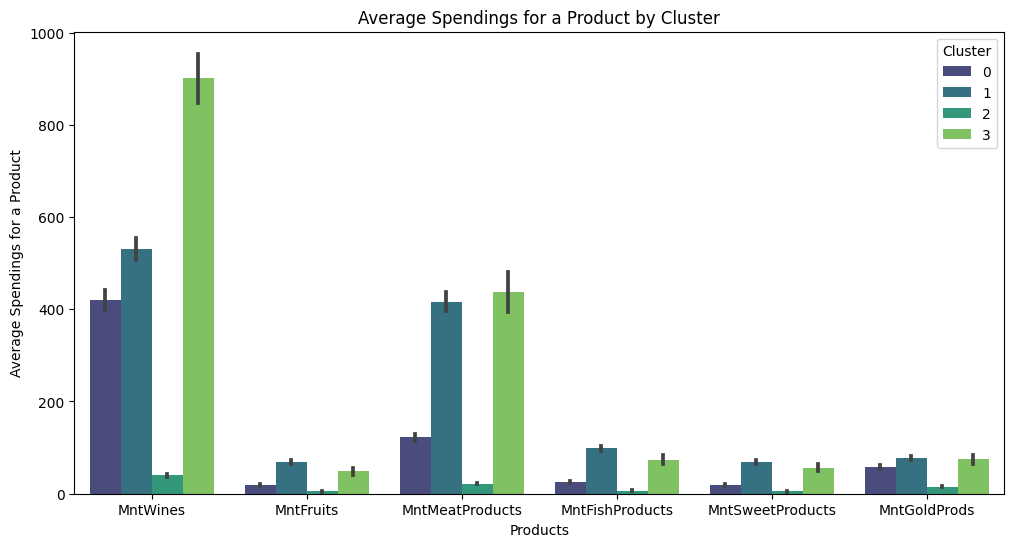

In [157]:
# List of campaigns done
products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
            'MntSweetProducts','MntGoldProds']

grouped_data = customer_df_cleaned.groupby('Cluster_KMeans')[products].mean().reset_index()

# Melt the DataFrame to a long format for easier plotting
melted_data = pd.melt(customer_df_cleaned, id_vars=['Cluster_KMeans'], value_vars=products, var_name='Products', value_name='Average Spendings for a Product')

plt.figure(figsize=(12, 6))
sns.barplot(x='Products', y='Average Spendings for a Product', hue='Cluster_KMeans', data=melted_data, palette='viridis')

plt.xlabel('Products')
plt.ylabel('Average Spendings for a Product')
plt.title('Average Spendings for a Product by Cluster')
plt.legend(title='Cluster')

# Show the plot
plt.show()

It can be seen that the two products that attracts the most customer are wines and meat products.

Cluster 3 stands out as the high-value segment with significantly higher spendings, especially on wines and meats, with Cluster 1 coming in second.

Cluster 2 is at the opposite end, showing minimal spending across all categories.

These insights can help in tailoring marketing strategies, such as targeting Clusters 2 and 3 for premium products or creating budget-friendly offerings for Cluster 2.